<a href="https://colab.research.google.com/github/celiahc823/MCD_UNISON/blob/main/ejercicio_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matemáticas para Ciencia de Datos
## Tarea 2: Producto punto en la clasificación de datos usando SVM
Basada en: https://chrisalbon.com/code/machine_learning/support_vector_machines/plot_support_vector_classifier_hyperplane/

## I. Importanción de librerías y toma de datos

In [13]:
# Load libraries
from numpy import mean
from numpy import std
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

In [14]:
# Load data with only two classes and two features
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]

## II. Estandarización de características

In [15]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

 1. $X$ es una lista de pares ordenados,  las cuales las podemos interpretar como una matrix de 100 instancias por 2 características. ¿Qué le hace la función scaler.fit_transform a $X$? Trata de describirlo en términos vectoriales. Escribe un pequeño código para verificar tu justificación.

 2. Cuál es la norma de cada una de las columnas de $X_{std}$.


# Respuesta de la Pregunta II.1
La función scaler.fit_transform del StandardScaler estandariza las características de $X$. Esto significa que transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Básicamente, ajusta la escala de los datos para que sean comparables, lo cual es importante para el SVM. En términos simples, esto se logra restando la media de cada característica y dividiendo por su desviación estándar.

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Datos para el ejemplo
X1 = np.array([[5.1, 3.5], [4.9, 3.0], [4.7, 3.2], [4.6, 3.1]])

# Escalando los datos
scaler = StandardScaler()
X1_std = scaler.fit_transform(X)

# Cálculo manual para validar
means = np.mean(X1, axis=0)
stds = np.std(X1, axis=0)
X1_manual_std = (X1 - means) / stds

print("X estandarizado por StandardScaler:\n", X_std)
print("X estandarizado manualmente:\n", X1_manual_std)

X estandarizado por StandardScaler:
 [[-5.81065904e-01  8.41837140e-01]
 [-8.94308978e-01 -2.07835104e-01]
 [-1.20755205e+00  2.12033793e-01]
 [-1.36417359e+00  2.09934449e-03]
 [-7.37687441e-01  1.05177159e+00]
 [-1.11201292e-01  1.68157493e+00]
 [-1.36417359e+00  6.31902691e-01]
 [-7.37687441e-01  6.31902691e-01]
 [-1.67741667e+00 -4.17769553e-01]
 [-8.94308978e-01  2.09934449e-03]
 [-1.11201292e-01  1.26170604e+00]
 [-1.05093052e+00  6.31902691e-01]
 [-1.05093052e+00 -2.07835104e-01]
 [-1.83403820e+00 -2.07835104e-01]
 [ 5.15284858e-01  1.89150938e+00]
 [ 3.58663321e-01  2.73124718e+00]
 [-1.11201292e-01  1.68157493e+00]
 [-5.81065904e-01  8.41837140e-01]
 [ 3.58663321e-01  1.47164049e+00]
 [-5.81065904e-01  1.47164049e+00]
 [-1.11201292e-01  6.31902691e-01]
 [-5.81065904e-01  1.26170604e+00]
 [-1.36417359e+00  1.05177159e+00]
 [-5.81065904e-01  4.21968242e-01]
 [-1.05093052e+00  6.31902691e-01]
 [-7.37687441e-01 -2.07835104e-01]
 [-7.37687441e-01  6.31902691e-01]
 [-4.24444366e-01 

Respuesta de la Pregunta II.2

La norma de una columna es básicamente una medida de su longitud. Para el conjunto de datos estandarizados, podemos calcular la norma $L2$, conocida como Norma Euclidiana

In [18]:
# Calculando la norma L2 de cada columna en X_std
norm_col1 = np.linalg.norm(X_std[:, 0])
norm_col2 = np.linalg.norm(X_std[:, 1])

print(f"Norma de la primera columna: {norm_col1}")
print(f"Norma de la segunda columna: {norm_col2}")

Norma de la primera columna: 9.999999999999996
Norma de la segunda columna: 10.000000000000004


Aquí la graficación de los datos estandarizados:

(-3.0, 3.0, -3.0, 3.0)

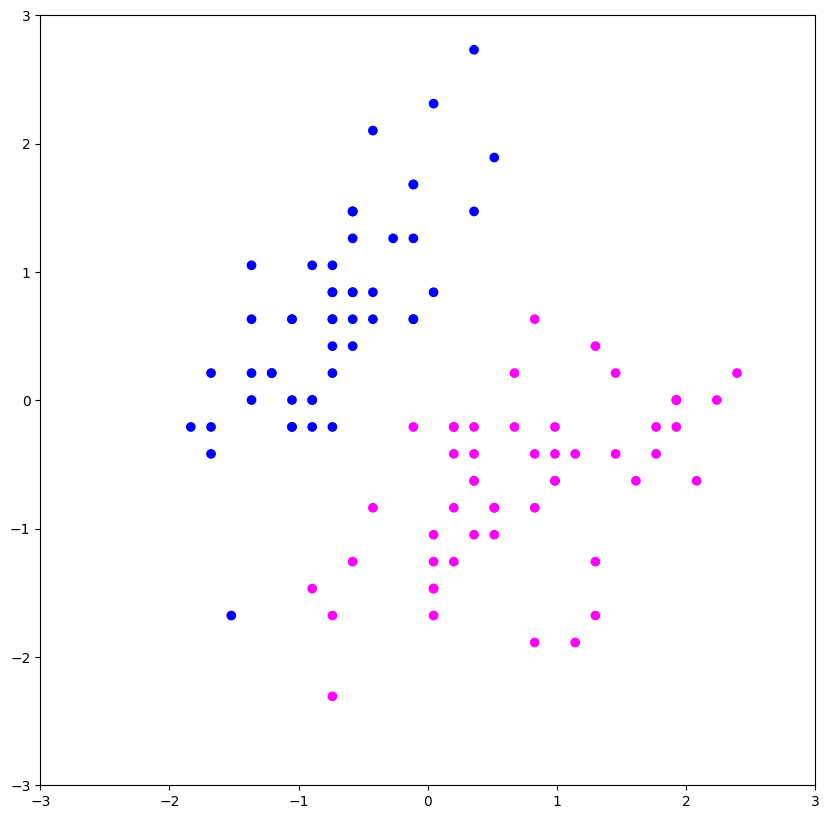

In [19]:
# Plot data points and color using their class
color = ['blue' if c == 0 else 'magenta' for c in y]
plt.figure(figsize=(10,10))
plt.scatter(X_std[:,0], X_std[:,1], c = color)
plt.axis([-3, 3, -3, 3])


## III.  Entrenamiento

In [20]:
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(X_std, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


La librería arroja los siguientes parámetros para describir el hiperplano separante:

In [21]:
w = model.coef_[0]

In [22]:
b = svc.intercept_[0]

El siguiente código grafica el hiperplano separante.

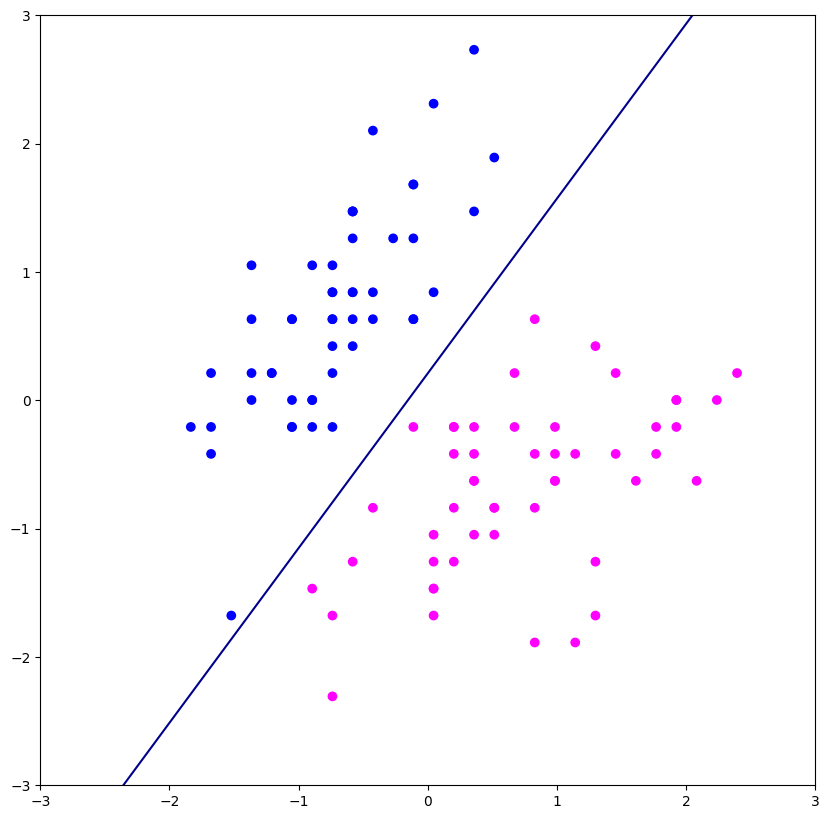

In [23]:
# Plot data points and color using their class
color = ['blue' if c == 0 else 'magenta' for c in y]
plt.figure(figsize=(10,10))
plt.scatter(X_std[:,0], X_std[:,1], c = color)
plt.axis([-3, 3, -3, 3])
m = - w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = m * xx - b / w[1]

# Plot the hyperplane
plt.plot(xx, yy, color='darkblue')
plt.show();

Notar que la recta NO pasa por el origen, está un poco más arriba, de hecho si $xx=0$ entonces $yy=-\frac{b}{w[1]}$.

3. Comprueba que la recta del código no es otra que el conjunto de soluciones de  $$ w \cdot x  + b = 0$$



# Respuesta 3:
Comprueba que la recta del código no es otra que el conjunto de soluciones de
 w⋅x+b=0.
Para comprobar esto, necesitamos ver la ecuación de la recta que se graficó en el código:

$y$=$𝑚$x$+$c

$𝑚$=$-w$[0]/$w$[1]  
$c$=$-b$/$w$[1].
En SVM, esta es la frontera de decisión.

Código para comprobar:

In [24]:
# Pesos y sesgo del modelo
w = model.coef_[0]
b = model.intercept_[0]

# Puntos en la línea (xx es el eje x)
xx = np.linspace(-2.5, 2.5)
yy = - (w[0] / w[1]) * xx - b / w[1]

# Verificar la ecuación del hiperplano
for i in range(len(xx)):
    # Calcular w · x + b
    value = w[0] * xx[i] + w[1] * yy[i] + b
    print(f"Para el punto ({xx[i]}, {yy[i]}), w · x + b = {value}")

Para el punto (-2.5, -3.194914468538419), w · x + b = 3.3306690738754696e-16
Para el punto (-2.3979591836734695, -3.055964139507157), w · x + b = -1.1102230246251565e-16
Para el punto (-2.295918367346939, -2.9170138104758947), w · x + b = 3.3306690738754696e-16
Para el punto (-2.193877551020408, -2.7780634814446317), w · x + b = -1.1102230246251565e-16
Para el punto (-2.0918367346938775, -2.6391131524133695), w · x + b = -1.1102230246251565e-16
Para el punto (-1.989795918367347, -2.5001628233821074), w · x + b = -5.551115123125783e-16
Para el punto (-1.8877551020408163, -2.3612124943508452), w · x + b = 3.3306690738754696e-16
Para el punto (-1.7857142857142856, -2.2222621653195826), w · x + b = -1.1102230246251565e-16
Para el punto (-1.683673469387755, -2.0833118362883205), w · x + b = 3.3306690738754696e-16
Para el punto (-1.5816326530612246, -1.9443615072570584), w · x + b = -1.1102230246251565e-16
Para el punto (-1.4795918367346939, -1.8054111782257958), w · x + b = -1.1102230246251

4. Grafica todos datos y la recta trasladados de tal manera que la recta pasa por el origen.


# Respuesta de la pregunta 4
Para hacer que la recta pase por el origen, debemos ajustar los datos restando el intercepto
$b$

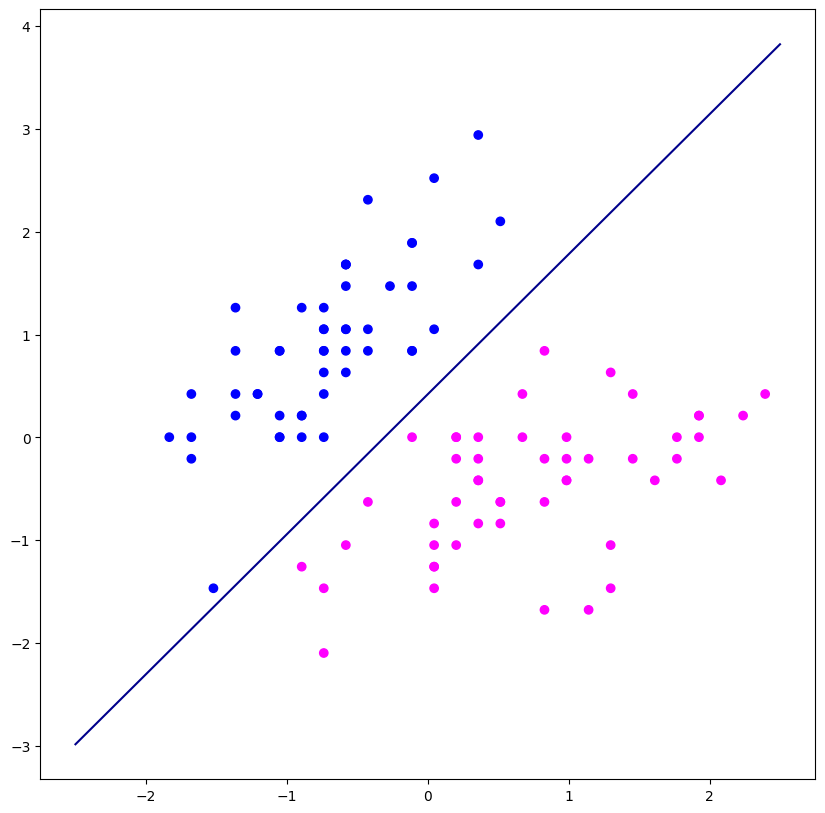

In [25]:
# Trasladar los datos
X_translated = X_std - [0, b / w[1]]

# Graficar los datos trasladados
plt.figure(figsize=(10, 10))
plt.scatter(X_translated[:, 0], X_translated[:, 1], c=color)
plt.plot(xx, yy - b / w[1], color='darkblue')  # Nueva recta
plt.show()

5. Comprueba que la recta trasladada es ortogonal a $w$, incluye a $w$ en la gráfica, en forma de flecha para verlo con claridad.


# Respuesta pregunta 5
Una recta es ortogonal a un vector si su producto punto es cero.

In [27]:
# Vector de dirección de la recta (pendiente)
direction_vector = np.array([1, -w[0] / w[1]])

# Comprobar si es ortogonal a w
dot_product = np.dot(direction_vector, w)
print(f"Producto punto entre el vector de dirección y w: {dot_product}")

Producto punto entre el vector de dirección y w: 0.0


6. A partir del parámetro  w , da un criterio para decidir si un par ordenado está del lado 'rosa' o el lado 'azul' (de los datos trasladados).



# Respuesta de la pregunta 6

Para decidir de qué lado de la recta está un punto, evaluamos el signo de
$w$ ⋅ $x$+$b$
,si es mayor que 0, está de un lado; si es menor que 0, está del otro lado.

In [29]:
def classify_new_point(new_point):
    # Estandarizar el nuevo punto utilizando el mismo scaler
    new_point_std = scaler.transform([new_point])

    # Calcular el producto punto y añadir el sesgo
    result = np.dot(w, new_point_std[0]) + b

    # Determinar y devolver la clase
    return 'rosa' if result > 0 else 'azul'

# Ejemplo de uso con un nuevo punto
new_point = [5.0, 3.5]  # Un punto cualquiera
classification = classify_new_point(new_point)
print(f"El nuevo punto {new_point} está en el lado '{classification}'")

El nuevo punto [5.0, 3.5] está en el lado 'azul'


7. Completa la libreta para que dado un dato nuevo, regrese la clase a la que pertence. No olvides tomar en cuenta el escalamiento ni la traslación.

# Respuesta Pregunta 7.
En este caso, debemos completar el proceso de escalamiento y traslación para que, al introducir un nuevo dato, el modelo pueda determinar a qué clase pertenece, sin olvidar el escalonamiento y la traslación:





1.   Estandarizar el nuevo dato (escalamiento).
2.   Trasladar el nuevo dato correctamente en función del hiperplano calculado.
3. El objetivo es que el modelo, después de aplicar estas transformaciones, clasifique correctamente el nuevo punto.



In [34]:
def classify_new_point(new_point):
    # Paso 1: Estandarizar el nuevo punto usando el mismo escalador que se usó en el entrenamiento
    new_point_std = scaler.transform([new_point])

    # Paso 2: Aplicar la traslación
    # En este caso, trasladamos el punto en función del hiperplano para asegurarnos de que el cálculo sea correcto
    # Restamos el valor necesario para ajustar el hiperplano al origen
    new_point_translated = new_point_std - np.array([0, b / w[1]])

    # Paso 3: Calcular el producto punto y sumar el sesgo para determinar de qué lado del hiperplano está el punto
    result = np.dot(w, new_point_translated[0])

    # Paso 4: Determinar y devolver la clase según el valor obtenido
    return 'rosa' if result > 0 else 'azul'

# Ejemplo de uso con un nuevo punto
new_point = [5.0, 3.5]  # Coordenadas del nuevo punto
classification = classify_new_point(new_point)
print(f"El nuevo punto {new_point} está en el lado '{classification}'")



El nuevo punto [5.0, 3.5] está en el lado 'azul'




8. (Opcional) Baja datos tridimensionales y haz lo mismo pero con un hiperplano separante de dimensión 2.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


El nuevo punto [0.5, -1.0, 1.5] está en el lado 'rosa'


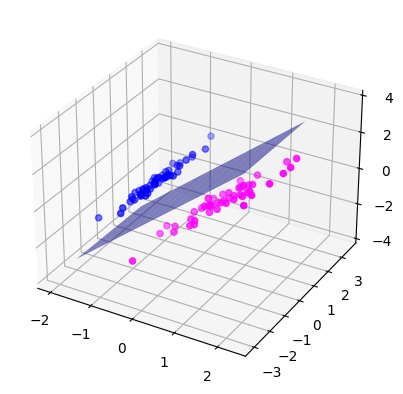

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Paso 1: Generar un conjunto de datos tridimensionales
X_3d, y_3d = make_classification(n_samples=100, n_features=3, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Paso 2: Estandarizar los datos
scaler_3d = StandardScaler()
X_3d_std = scaler_3d.fit_transform(X_3d)

# Paso 3: Entrenar el modelo SVM en datos 3D
svc_3d = LinearSVC(C=1.0)
model_3d = svc_3d.fit(X_3d_std, y_3d)

# Obtener pesos y sesgo del modelo
w_3d = model_3d.coef_[0]
b_3d = model_3d.intercept_[0]

# Paso 4: Trasladar los datos para que el hiperplano pase por el origen
# La traslación ajusta los datos para que el hiperplano quede centrado en el origen
# Trasladamos los datos usando b_3d / ||w_3d|| en la dirección del vector normal w
norm_w_3d = np.linalg.norm(w_3d)
X_3d_translated = X_3d_std - (b_3d / norm_w_3d)

# Paso 5: Clasificación de un nuevo punto en dimensión 3
def classify_new_point_3d(new_point):
    # Estandarizar el nuevo punto
    new_point_std = scaler_3d.transform([new_point])

    # Trasladar el nuevo punto para que el hiperplano pase por el origen
    new_point_translated = new_point_std - (b_3d / norm_w_3d)

    # Calcular el producto punto para decidir la clase
    result = np.dot(w_3d, new_point_translated[0])
    return 'rosa' if result > 0 else 'azul'

# Ejemplo de uso con un nuevo punto tridimensional
new_point_3d = [0.5, -1.0, 1.5]  # Un punto cualquiera en el espacio de 3 dimensiones
classification_3d = classify_new_point_3d(new_point_3d)
print(f"El nuevo punto {new_point_3d} está en el lado '{classification_3d}'")

# Paso 6: Graficar los puntos y el hiperplano en 3D para visualización
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos trasladados
colors = ['blue' if label == 0 else 'magenta' for label in y_3d]
ax.scatter(X_3d_translated[:, 0], X_3d_translated[:, 1], X_3d_translated[:, 2], c=colors)

# Crear una cuadrícula para el hiperplano
xx, yy = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
zz = (-w_3d[0] * xx - w_3d[1] * yy) / w_3d[2]  # Ecuación del hiperplano trasladado

# Graficar el hiperplano trasladado
ax.plot_surface(xx, yy, zz, color='darkblue', alpha=0.5)
plt.show()



9. (Opcional) ¿El algoritmo (sin las gráficas), vale si tengo datos de dimensión 10?

# Respuesta pregunta 9.
Sí, el algoritmo SVM funciona incluso si tenemos datos con 10 dimensiones. De hecho, es bastante bueno para trabajar con datos de muchas características. El único problema es que, cuando trabajamos con tantas dimensiones, no podemos ver el "hiperplano" que separa las clases, pero el SVM sigue haciendo su trabajo.

In [36]:
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generar un conjunto de datos de 10 dimensiones
X_10d, y_10d = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)

# Estandarizar los datos
scaler_10d = StandardScaler()
X_10d_std = scaler_10d.fit_transform(X_10d)

# Entrenar el modelo SVM en datos de 10 dimensiones
svc_10d = LinearSVC(C=1.0)
model_10d = svc_10d.fit(X_10d_std, y_10d)

# Obtener pesos y sesgo del modelo
w_10d = model_10d.coef_[0]
b_10d = model_10d.intercept_[0]

# Clasificación de un nuevo punto en dimensión 10
def classify_new_point_10d(new_point):
    # Estandarizar el nuevo punto
    new_point_std = scaler_10d.transform([new_point])

    # Trasladar el nuevo punto para que el hiperplano pase por el origen
    norm_w_10d = np.linalg.norm(w_10d)
    new_point_translated = new_point_std - (b_10d / norm_w_10d)

    # Calcular el producto punto para decidir la clase
    result = np.dot(w_10d, new_point_translated[0])
    return 'rosa' if result > 0 else 'azul'

# Ejemplo de uso con un nuevo punto en 10 dimensiones
new_point_10d = [0.5] * 10  # Un punto cualquiera en el espacio de 10 dimensiones
classification_10d = classify_new_point_10d(new_point_10d)
print(f"La clase del nuevo punto en el espacio de 10 dimensiones es: {classification_10d}")


La clase del nuevo punto en el espacio de 10 dimensiones es: azul


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


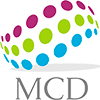

In [9]:
display.Image("https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png", embed = True)